In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Run KNN model to predict the full price
write a short summery here

In [9]:
# Load the data
df1 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_05_07.csv")
df2 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_20_06.csv")
df3 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_25_06.csv")

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

Results for KNN Regressor:
{'Model': 'KNN Regressor', 'Train R2': 0.8898102358765271, 'Train RMSE': 132.96898613771768, 'Train MSE': 17680.75127449256, 'Train MAE': 95.4435360748584, 'Test R2': 0.8166575448768444, 'Test RMSE': 171.52797411228767, 'Test MSE': 29421.845903065623, 'Test MAE': 123.82474658349408, 'Train Size': 56854, 'Test Size': 24367}


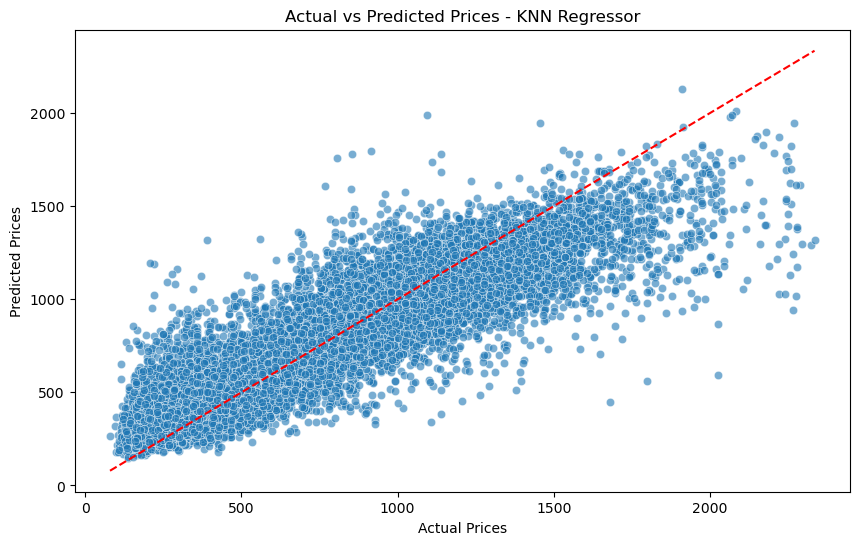

In [10]:
# Function to run KNN Regressor and calculate metrics
def run_knn_regressor(df):

    columns_to_use = ['TTT', 'LOS', 'score',
       'reviews', 'full_price',
       'Free_cancellation', 'No_payment', 'Breakfast', 'Option Member',
       'star_rating', 'location_rating',
       'km_from_center']
    df = df[columns_to_use]

    # Keep only numeric columns
    df = df.select_dtypes(include=[np.number])
    
    # Remove columns with all NaN values
    df = df.dropna(axis=1, how='all')
    
    # Ensure there are no remaining NaN values
    imputer = SimpleImputer(strategy='mean')
    df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    
    # Split the data into train and test sets
    X = df.drop(columns=['full_price'])
    y = df['full_price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Initialize KNN Regressor
    model = KNeighborsRegressor(n_neighbors=5)
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    
    # Test metrics
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    results = {
        'Model': 'KNN Regressor',
        'Train R2': train_r2,
        'Train RMSE': train_rmse,
        'Train MSE': train_mse,
        'Train MAE': train_mae,
        'Test R2': test_r2,
        'Test RMSE': test_rmse,
        'Test MSE': test_mse,
        'Test MAE': test_mae,
        'Train Size': len(X_train),
        'Test Size': len(X_test)
    }
    
    return results, y_test, y_test_pred

# Run KNN Regressor
results, y_test, y_test_pred = run_knn_regressor(df)

# Display results
print("Results for KNN Regressor:")
print(results)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - KNN Regressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

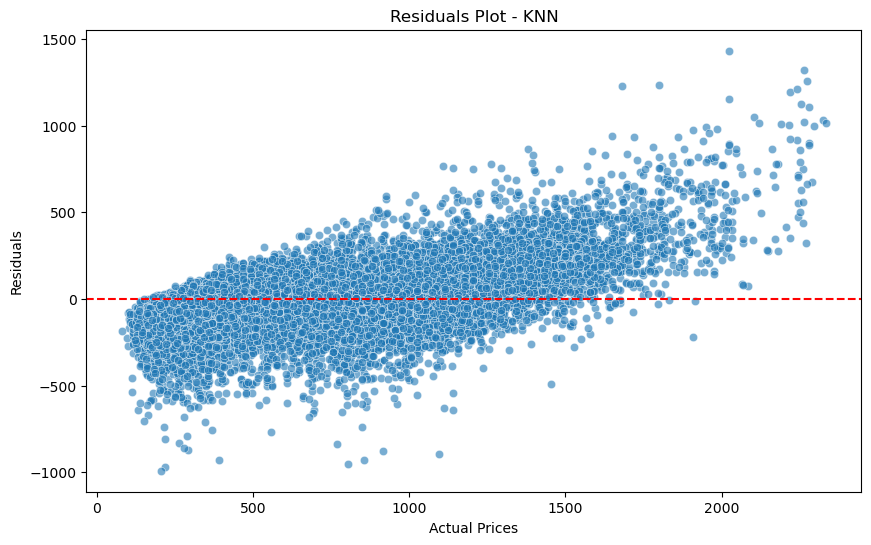

In [11]:
# Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title(f'Residuals Plot - KNN')
plt.show()

# Run KNN model to predict full price with the new features (features engineering)

In [12]:
# Load the data
df1 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_features_engineering_20_06.csv")
df2 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_features_engineering_25_06.csv")
df3 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_features_engineering_05_07.csv")

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

Results for KNN Regressor with features engineering:
{'Model': 'KNN Regressor', 'Train R2': 0.8694258762199023, 'Train RMSE': 134.06524666501488, 'Train MSE': 17973.490363351284, 'Train MAE': 99.45557979412366, 'Test R2': 0.7794863399467331, 'Test RMSE': 172.3981534552401, 'Test MSE': 29721.12331477652, 'Test MAE': 127.75689518053127, 'Train Size': 29338, 'Test Size': 12574}


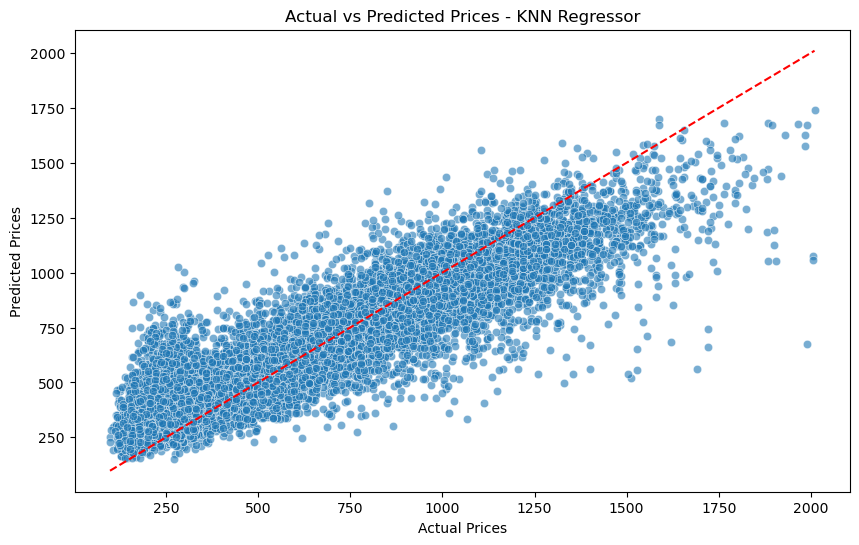

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Merge the dataframes
# df = pd.concat([df1, df2, df3], ignore_index=True)

# Remove columns that are not needed for regression
columns_to_use = ['TTT', 'LOS', 'score',
       'reviews', 'full_price',
       'Free_cancellation', 'No_payment', 'Breakfast', 'Option Member',
       'star_rating', 'location_rating',
       'km_from_center', 'checkin_day', 'checkout_day', 'checkin_day_name_Friday',
       'checkin_day_name_Monday', 'checkin_day_name_Saturday',
       'checkin_day_name_Sunday', 'checkin_day_name_Thursday',
       'checkin_day_name_Tuesday', 'checkin_day_name_Wednesday',
       'checkin_day_name_nan', 'checkout_day_name_Friday',
       'checkout_day_name_Monday', 'checkout_day_name_Saturday',
       'checkout_day_name_Sunday', 'checkout_day_name_Thursday',
       'checkout_day_name_Tuesday', 'checkout_day_name_Wednesday',
       'checkout_day_name_nan', 'period_of_the_month_beginning of the month',
       'period_of_the_month_end of the month',
       'period_of_the_month_middle of the month']
df = df[columns_to_use]

# Function to run KNN Regressor and calculate metrics
def run_knn_regressor(df):
    # Keep only numeric columns
    df = df.select_dtypes(include=[np.number])
    
    # Remove columns with all NaN values
    df = df.dropna(axis=1, how='all')
    
    # Ensure there are no remaining NaN values
    imputer = SimpleImputer(strategy='mean')
    df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    
    # Split the data into train and test sets
    X = df.drop(columns=['full_price'])
    y = df['full_price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Initialize KNN Regressor
    model = KNeighborsRegressor(n_neighbors=5)
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    
    # Test metrics
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    results = {
        'Model': 'KNN Regressor',
        'Train R2': train_r2,
        'Train RMSE': train_rmse,
        'Train MSE': train_mse,
        'Train MAE': train_mae,
        'Test R2': test_r2,
        'Test RMSE': test_rmse,
        'Test MSE': test_mse,
        'Test MAE': test_mae,
        'Train Size': len(X_train),
        'Test Size': len(X_test)
    }
    
    return results, y_test, y_test_pred

# Run KNN Regressor
results, y_test, y_test_pred = run_knn_regressor(df)

# Display results
print("Results for KNN Regressor with features engineering:")
print(results)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - KNN Regressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

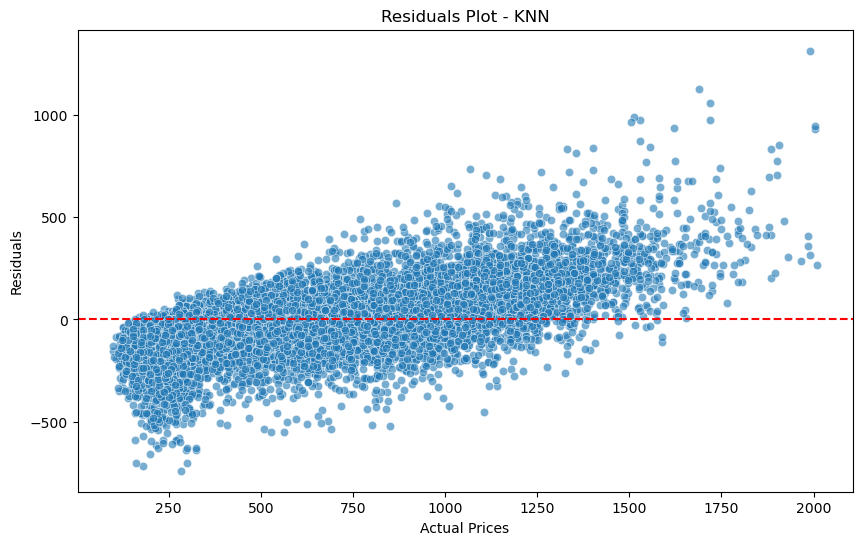

In [14]:
# Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title(f'Residuals Plot - KNN')
plt.show()

# Repeat the process but on data after normalization
1. Linear regression on normalized data
2. Linear regression on normalized data with features engineering

In [15]:
# Load the data
df1 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_normalized_data_05_07.csv")
df2 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_normalized_data_20_06.csv")
df3 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_normalized_data_25_06.csv")

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

Results for KNN Regressor after data normalization:
{'Model': 'KNN Regressor', 'Train R2': 0.9008276531318271, 'Train RMSE': 0.31455075889247547, 'Train MSE': 0.09894217991983224, 'Train MAE': 0.2224821785862554, 'Test R2': 0.8573176110032744, 'Test RMSE': 0.3787245535214254, 'Test MSE': 0.14343228744000303, 'Test MAE': 0.2706772189813645, 'Train Size': 29275, 'Test Size': 12547}


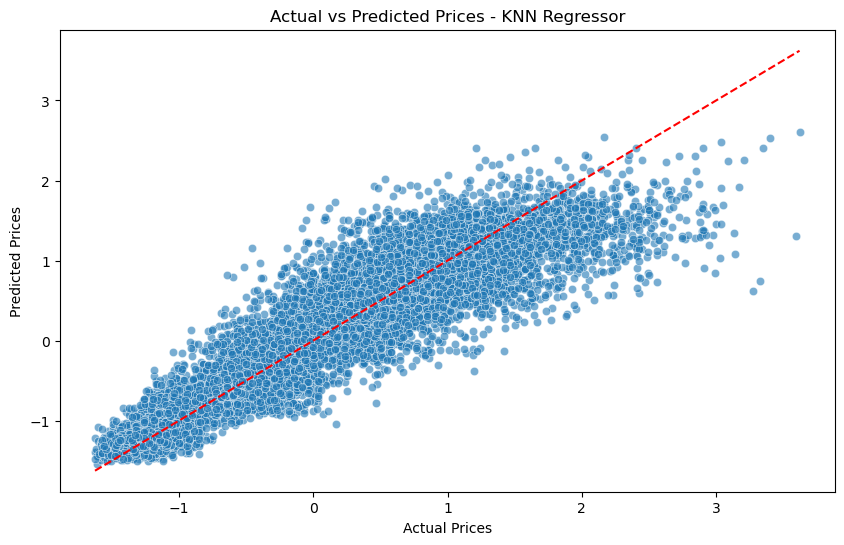

In [16]:
# Function to run KNN Regressor and calculate metrics
def run_knn_regressor(df):

    columns_to_use = ['TTT', 'LOS', 'score',
       'reviews', 'full_price',
       'Free_cancellation', 'No_payment', 'Breakfast', 'Option Member',
       'star_rating', 'location_rating',
       'km_from_center']
    df = df[columns_to_use]

    # Keep only numeric columns
    df = df.select_dtypes(include=[np.number])
    
    # Remove columns with all NaN values
    df = df.dropna(axis=1, how='all')
    
    # Ensure there are no remaining NaN values
    imputer = SimpleImputer(strategy='mean')
    df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    
    # Split the data into train and test sets
    X = df.drop(columns=['full_price'])
    y = df['full_price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Initialize KNN Regressor
    model = KNeighborsRegressor(n_neighbors=5)
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    
    # Test metrics
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    results = {
        'Model': 'KNN Regressor',
        'Train R2': train_r2,
        'Train RMSE': train_rmse,
        'Train MSE': train_mse,
        'Train MAE': train_mae,
        'Test R2': test_r2,
        'Test RMSE': test_rmse,
        'Test MSE': test_mse,
        'Test MAE': test_mae,
        'Train Size': len(X_train),
        'Test Size': len(X_test)
    }
    
    return results, y_test, y_test_pred

# Run KNN Regressor
results, y_test, y_test_pred = run_knn_regressor(df)

# Display results
print("Results for KNN Regressor after data normalization:")
print(results)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - KNN Regressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

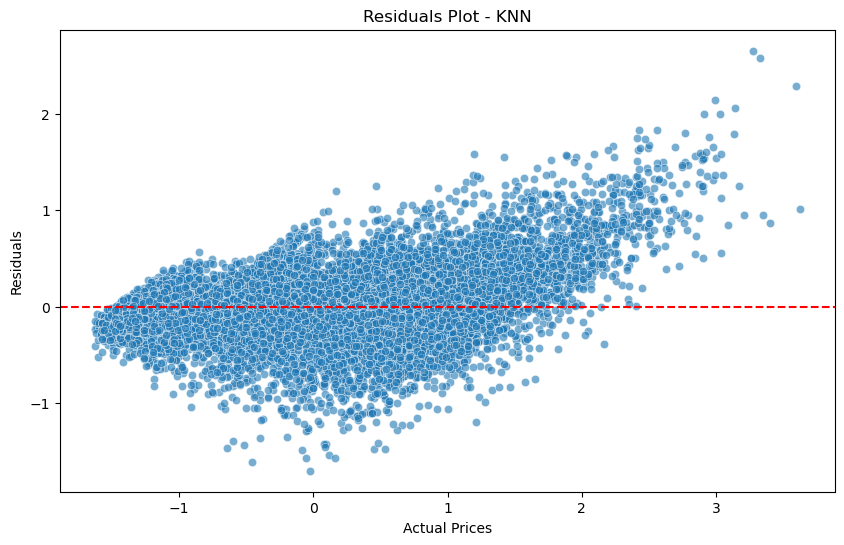

In [17]:
# Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title(f'Residuals Plot - KNN')
plt.show()

In [18]:
# Load the data
df1 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_normalized_with_features_engineering_20_06.csv")
df2 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_normalized_with_features_engineering_25_06.csv")
df3 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_normalized_with_features_engineering_05_07.csv")

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

Results for KNN Regressor with features engineering and data normalization:
{'Model': 'KNN Regressor', 'Train R2': 0.9257151213936888, 'Train RMSE': 0.27273479164027986, 'Train MSE': 0.07438426657106686, 'Train MAE': 0.19526231540512654, 'Test R2': 0.8844217818277447, 'Test RMSE': 0.33938261755630345, 'Test MSE': 0.11518056109936814, 'Test MAE': 0.2433481604526058, 'Train Size': 29275, 'Test Size': 12547}


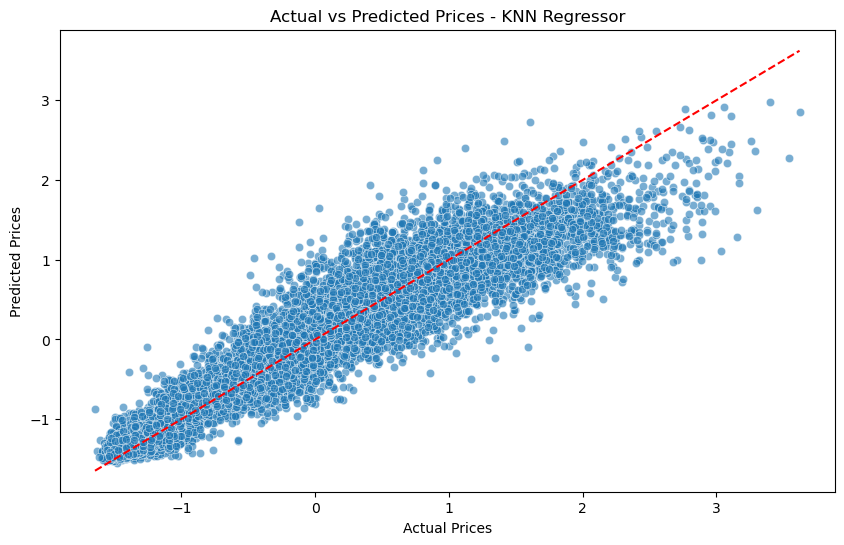

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Merge the dataframes
# df = pd.concat([df1, df2, df3], ignore_index=True)

# Remove columns that are not needed for regression
columns_to_use = ['TTT', 'LOS', 'score',
       'reviews', 'full_price',
       'Free_cancellation', 'No_payment', 'Breakfast', 'Option Member',
       'star_rating', 'location_rating',
       'km_from_center', 'checkin_day', 'checkout_day', 'checkin_day_name_Friday',
       'checkin_day_name_Monday', 'checkin_day_name_Saturday',
       'checkin_day_name_Sunday', 'checkin_day_name_Thursday',
       'checkin_day_name_Tuesday', 'checkin_day_name_Wednesday',
       'checkin_day_name_nan', 'checkout_day_name_Friday',
       'checkout_day_name_Monday', 'checkout_day_name_Saturday',
       'checkout_day_name_Sunday', 'checkout_day_name_Thursday',
       'checkout_day_name_Tuesday', 'checkout_day_name_Wednesday',
       'checkout_day_name_nan', 'period_of_the_month_beginning of the month',
       'period_of_the_month_end of the month',
       'period_of_the_month_middle of the month']
df = df[columns_to_use]

# Function to run KNN Regressor and calculate metrics
def run_knn_regressor(df):
    # Keep only numeric columns
    df = df.select_dtypes(include=[np.number])
    
    # Remove columns with all NaN values
    df = df.dropna(axis=1, how='all')
    
    # Ensure there are no remaining NaN values
    imputer = SimpleImputer(strategy='mean')
    df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    
    # Split the data into train and test sets
    X = df.drop(columns=['full_price'])
    y = df['full_price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Initialize KNN Regressor
    model = KNeighborsRegressor(n_neighbors=5)
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    
    # Test metrics
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    results = {
        'Model': 'KNN Regressor',
        'Train R2': train_r2,
        'Train RMSE': train_rmse,
        'Train MSE': train_mse,
        'Train MAE': train_mae,
        'Test R2': test_r2,
        'Test RMSE': test_rmse,
        'Test MSE': test_mse,
        'Test MAE': test_mae,
        'Train Size': len(X_train),
        'Test Size': len(X_test)
    }
    
    return results, y_test, y_test_pred

# Run KNN Regressor
results, y_test, y_test_pred = run_knn_regressor(df)

# Display results
print("Results for KNN Regressor with features engineering and data normalization:")
print(results)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - KNN Regressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

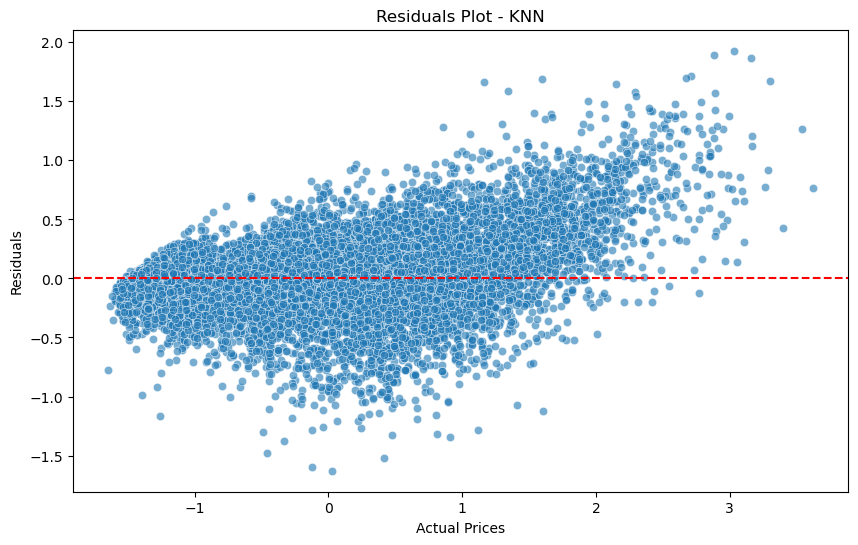

In [20]:
# Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title(f'Residuals Plot - KNN')
plt.show()

# Summary of KNN Regressor Results
* Initial KNN Regressor Model - The initial KNN Regressor model shows good performance with relatively high R2 values and acceptable error metrics.
* KNN Regressor with Feature Engineering - Feature engineering does not improve the model significantly. The performance metrics show a slight decrease in the R2 score and an increase in error metrics compared to the initial model.
* KNN Regressor with Data Normalization - Normalization improves the model's performance, increasing the R2 values and reducing the error metrics significantly, indicating better generalization and fit.
* KNN Regressor with Feature Engineering and Data Normalization - Combining feature engineering and normalization yields the best results for the KNN Regressor. The model achieves the highest R2 scores and the lowest error metrics, indicating the best fit and generalization among all the approaches.

# Conclusion
* Initial Model: Shows good performance but with room for improvement.
* Feature Engineering: Does not significantly improve the model and slightly increases error metrics.
* Data Normalization: Significantly enhances model performance and generalization.
* Combined Feature Engineering and Normalization: Provides the best overall performance, achieving the highest accuracy and lowest errors.

Overall, the KNN Regressor model, particularly with data normalization and feature engineering combined, demonstrates strong predictive capabilities and excellent generalization to new data.